---
title: Implementation
---

This document illustrate usage of manifold learning techniques on various toy dataset using `sklearn` library.

### Imports

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context = 'notebook', style = 'ticks', palette = 'deep', color_codes = True)

plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 3, 3
plt.rcParams['image.cmap'] = "hot"

### Datasets presentation

In [62]:
from sklearn.datasets import make_swiss_roll, make_s_curve, make_moons, make_blobs
from mpl_toolkits.mplot3d import Axes3D

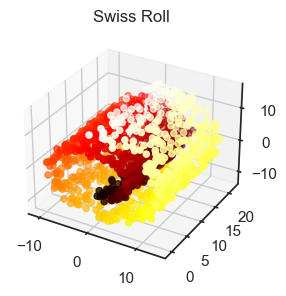

In [63]:
# Swiss Roll dataset

X_swiss_roll, t_swiss_roll = make_swiss_roll(n_samples=1500, noise=0.5, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_swiss_roll[:, 0], X_swiss_roll[:, 1], X_swiss_roll[:, 2], c=t_swiss_roll)
ax.set_title('Swiss Roll')
plt.show()

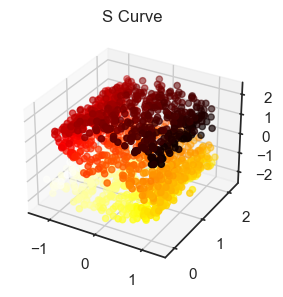

In [64]:
# S Curve dataset

X_s_curve, t_s_curve = make_s_curve(n_samples=1500, noise=0.1, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_s_curve[:, 0], X_s_curve[:, 1], X_s_curve[:, 2], c=t_s_curve)
ax.set_title('S Curve')
plt.show()

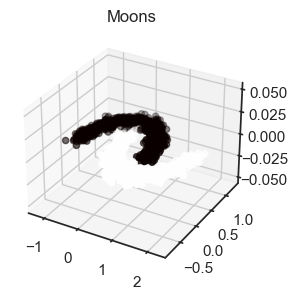

In [65]:
# Moons dataset

X_moons, t_moons = make_moons(n_samples=1500, noise=0.1, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=t_moons)
ax.set_title('Moons')
plt.show()

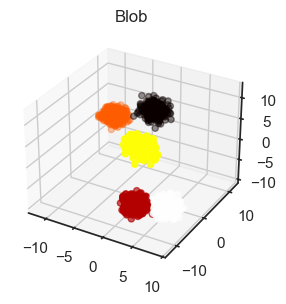

In [66]:
# Blob dataset

X_blob, t_blob = make_blobs(n_samples=1500, centers=5, n_features=3, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_blob[:, 0], X_blob[:, 1], X_blob[:, 2], c=t_blob)
ax.set_title('Blob')
plt.show()

### Multi-dimensional Scaling (MDS)

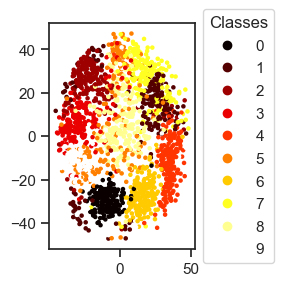

In [67]:
from sklearn.manifold import MDS
from sklearn.datasets import load_digits

# Load the MNINST digits dataset
digits = load_digits()
X, t = digits.data, digits.target

model = MDS(n_components=2, random_state=42)
X_mds = model.fit_transform(X)

# Plot of the dataset
fig, ax = plt.subplots()
scatter = ax.scatter(X_mds[:,0], X_mds[:,1], s=5, c=t)
legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
ax.add_artist(legend);

### Isomap

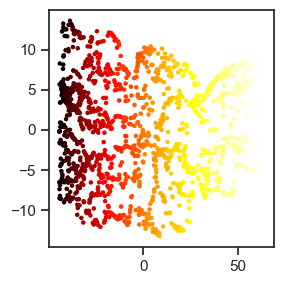

In [68]:
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1500, noise=0.5, random_state=42)

model = Isomap(n_components=2, n_neighbors=5)
X_iso = model.fit_transform(X)

# Plot of the dataset
fig, ax = plt.subplots()
ax.scatter(X_iso[:,0], X_iso[:,1], s=5, c=t);

### Locally Linear Embedding (LLE)

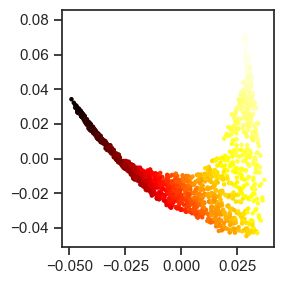

In [69]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_s_curve

X, t = make_s_curve(n_samples=1500, noise=0.1, random_state=42)

model = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = model.fit_transform(X)

# Plot of the dataset
fig, ax = plt.subplots()
ax.scatter(X_lle[:,0], X_lle[:,1], s=5, c=t);

### Modified Locally Linear Embedding (MLLE)

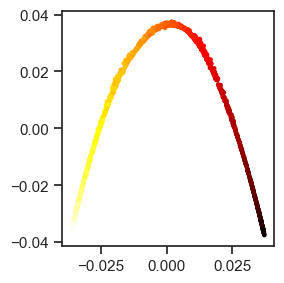

In [70]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_s_curve

X, t = make_s_curve(n_samples=1500, noise=0.1, random_state=42)

model = LocallyLinearEmbedding(n_components=2, n_neighbors=10, method='modified')
X_mlle = model.fit_transform(X)

# Plot of the dataset
fig, ax = plt.subplots()
ax.scatter(X_mlle[:,0], X_mlle[:,1], s=5, c=t);

### Hessian Eigenmapping (HLLE)

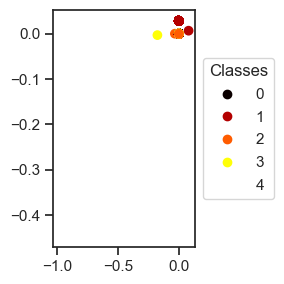

In [71]:
from sklearn.datasets import make_blobs
from sklearn.manifold import LocallyLinearEmbedding

X, t = make_blobs(n_samples=5000, centers=5, n_features=5, cluster_std=0.5, random_state=42)

model = LocallyLinearEmbedding(n_components=2, n_neighbors=20, method='hessian', eigen_solver='dense')
X_hlle = model.fit_transform(X)

# Plot of the dataset
fig, ax = plt.subplots()
scatter = ax.scatter(X_hlle[:,0], X_hlle[:,1], c=t)
legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
ax.add_artist(legend);

### Local Tangent Space Alignment (LTSA)

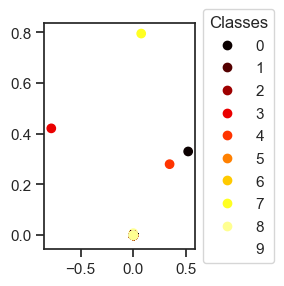

In [72]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_components=2, n_neighbors=10, method='ltsa', eigen_solver='dense')
X_ltsa = model.fit_transform(digits.data)

# Plot of the dataset
fig, ax = plt.subplots()
scatter = ax.scatter(X_ltsa[:,0], X_ltsa[:,1], c=digits.target)
legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
ax.add_artist(legend);

### Spectral Embedding

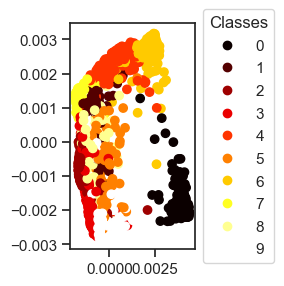

In [73]:
from sklearn.manifold import SpectralEmbedding

model = SpectralEmbedding(n_components=2)
X_spectral = model.fit_transform(digits.data)

# Plot of the dataset
fig, ax = plt.subplots()
scatter = ax.scatter(X_spectral[:,0], X_spectral[:,1], c=digits.target)
legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
ax.add_artist(legend);

### t-distributed Stochastic Neighbor Embedding (t-SNE)

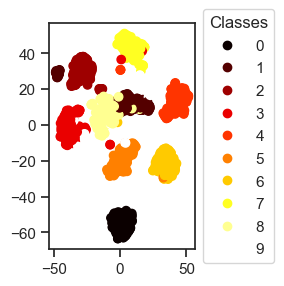

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=42)
X_tsne = model.fit_transform(digits.data)

# Plot of the dataset
fig, ax = plt.subplots()
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=digits.target)
legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
ax.add_artist(legend);